
<font size="6" color="Green" align="center"><b>LEVEL 2</b></font><br>

<font size="5" color="Darkblue" align="center"><b>Project3:
Fraud Detection</b></font><br>

<font size="4" color="purple" align="center"><b>Introduction</b></font><br>

<p align="justify">
This Fraud Detection project is centered on identifying fraudulent transactions within a dataset of credit card transactions. The primary objective is to accurately classify transactions as either fraudulent or legitimate. Fraud detection is crucial in the financial industry, where the ability to swiftly and accurately identify deceptive activities is essential for protecting users and institutions.
</p>
<font size="4" color="purple" align="center"><b>Objective</b></font><br>

<p align="justify">
The objective of this project is to detect fraudulent transactions within a dataset of credit card transactions. The goal is to develop a robust system that can correctly classify transactions as either fraudulent or legitimate, minimizing the risk of financial loss due to fraud.
</p>
<font size="4" color="purple" align="center"><b>Challenges</b></font><br>

<p align="justify">
Fraud detection presents several challenges. One of the most significant is the imbalanced nature of the data, where fraudulent transactions are rare compared to legitimate ones. This imbalance makes it difficult to train models that can accurately detect fraud without generating a high number of false positives. Additionally, there is a need for real-time analysis to ensure that fraudulent activities are detected and mitigated promptly. Furthermore, the system must maintain a low false positive rate, as too many false alarms can lead to unnecessary disruptions and loss of trust in the system.
</p>
<font size="4" color="purple" align="center"><b>Fraud Detection System</b></font><br>

<p align="justify">
In this project, various machine learning techniques, including anomaly detection and pattern recognition, will be employed to build an effective fraud detection system. The system will:
</p>

- Identify and preprocess relevant features to enhance detection accuracy.
- Explore multiple machine learning models to predict fraudulent transactions.
- Implement real-time monitoring to ensure rapid detection and response to fraud.
- Ensure scalability to handle large volumes of transactions efficiently while maintaining a low false positive rate.

<p align="justify">
This project will provide valuable insights into the complexities of fraud detection and demonstrate how advanced analytics and machine learning can be applied to safeguard financial systems against fraudulent activities.
</p>
<font size="4" color="purple" align="center"><b>About the Dataset</b></font><br>

<p align="justify">
The dataset used in this project is sourced from a publicly available credit card fraud detection dataset on Kaggle. It includes features such as `Time`, `Amount`, and various anonymized variables obtained through PCA transformations. Due to the highly imbalanced nature of the dataset, with only a small fraction of transactions labeled as fraudulent, it presents an ideal case for exploring anomaly detection and model evaluation. Dataset: (<a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">link</a>).
</p>
<p align="justify">
This dataset will be critical in enhancing the understanding of:
</p>
- The characteristics that distinguish fraudulent transactions from legitimate ones.
- The application of machine learning models to imbalanced datasets.
- The development of a scalable and efficient fraud detection system.

<b> Key Concepts and Challenges </b>

1. Anomaly Detection: Spotting unusual patterns in the data.
2. Machine Learning Models: Using algorithms like Logistic Regression, Decision Trees, and XGBoost for prediction.
3. Feature Engineering: Enhancing model accuracy through relevant feature selection and transformation.
4. Real-time Monitoring: Detecting and responding to fraud instantly.
5. Scalability: Building systems that handle large transaction volumes with low false positives.


<font size="4" color="green" align="center"><b>Importing Necessary Libraries</b></font><b></b>

In [20]:
# pip install pandas numpy scikit-learn xgboost imbalanced-learn matplotlib seaborn
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns
import joblib


<font size="4" color="darkblue" align="center"><b>1. Data Collection</b></font></b>

1.1 Load the Dataset

In [21]:
# Read CSV file into a DataFrame
df = pd.read_csv("creditcard.csv")

<font size="3" color="black" align="center"><b>1.1 Explore the Dataset</b></font></b>

In [22]:
df.head() # Show first 5 records of data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.tail() # Last five rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [24]:
# Show the dimensions of the DataFrame
df.shape

(284807, 31)

In [25]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [27]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<font size="4" color="darkblue" align="center"><b>2. Data Preparation</b></font></b>

<font size="3" color="black" align="center"><b>2.1 Handle missing values</b></font>

In [29]:
# Fill missing values with median or mean depending on the column
for column in df.columns:
    if df[column].isnull().any():
        median_value = df[column].median() if df[column].dtype == 'float64' else df[column].mode()[0]
        df[column].fillna(median_value, inplace=True)

# Verify missing values have been handled
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<font size="3" color="black" align="center"><b>2.2 Separate features and target variable</b></font>


In [30]:
X = df.drop('Class', axis=1)
y = df['Class']

<font size="3" color="black" align="center"><b>2.3 Feature Scaling</b></font>

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<font size="3" color="black" align="center"><b>2.4 Handle imbalanced data</b></font>

Class
0    284315
1       492
Name: count, dtype: int64


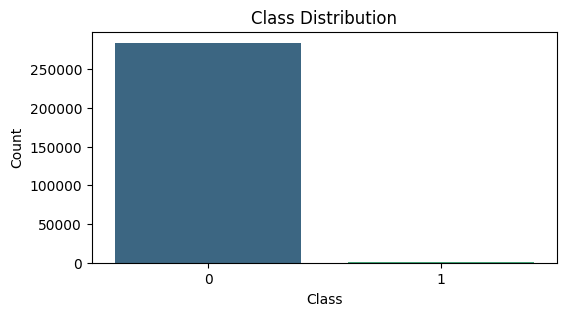

In [32]:
class_counts = df['Class'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Check the class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


<font size="3" color="black" align="center"><b>2.5 Split dat into training and testing</b></font>

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

<font size="4" color="darkblue" align="center"><b>3. Model Build
 with Define hyperparameters for each model</b></font></b>

In [16]:
# Define hyperparameters for each model
param_grid_log_reg = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

param_grid_dec_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 4, 7]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize models
log_reg = LogisticRegression(solver='liblinear')
dec_tree = DecisionTreeClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning with GridSearchCV
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=3, scoring='roc_auc', n_jobs=-1)
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_

grid_dec_tree = GridSearchCV(dec_tree, param_grid_dec_tree, cv=3, scoring='roc_auc', n_jobs=-1)
grid_dec_tree.fit(X_train, y_train)
best_dec_tree = grid_dec_tree.best_estimator_

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

<font size="4" color="purple" align="center"><b>Model Configurations</b></font><br>

<font color='green' size='3'><b>Logistic Regression Model Configurations</b></font>
The Logistic Regression model is used to predict the target variable based on the input features. Configuration details include:

<font color='green' size='3'><b>Hyperparameter Tuning with Cross-Validation</b></font>
- <b>penalty:</b>
  - Regularization type is tuned with values 'l1' and 'l2'.
- <b>C:</b>
  - The inverse of regularization strength is tuned with values 0.1, 1, and 10.

<font color='green' size='3'><b>Cross-Validation: </b></font> 3-fold cross-validation is used to enhance model generalization.

<font color='green' size='3'><b>Evaluation Metric: </b></font>Area under the ROC curve (AUC) is used to evaluate model performance.

<font color='green' size='3'><b>Impact on Performance: </b></font>Optimized hyperparameters and cross-validation improve predictive accuracy.

<font color='green' size='3'><b>Result: </b></font>Logistic Regression - Best AUC score achieved.

<font color='green' size='3'><b>Decision Tree Model Configurations</b></font>
The Decision Tree model is utilized to classify the target variable based on input features. Configuration details include:

<font color='green' size='3'><b>Hyperparameter Tuning with Cross-Validation</b></font>
- <b>criterion:</b>
  - The function to measure the quality of a split is tuned with values 'gini' and 'entropy'.
- <b>max_depth:</b>
  - The maximum depth of the tree is tuned with values 5, 4, and 7.

<font color='green' size='3'><b>Cross-Validation: </b></font> 3-fold cross-validation is used to enhance model generalization.

<font color='green' size='3'><b>Evaluation Metric: </b></font>Area under the ROC curve (AUC) is used to evaluate model performance.

<font color='green' size='3'><b>Impact on Performance: </b></font>Optimized hyperparameters and cross-validation enhance predictive accuracy.

<font color='green' size='3'><b>Result: </b></font>Decision Tree - Best AUC score achieved.

<font color='green' size='3'><b>XGBoost Model Configurations</b></font>
The XGBoost model is employed for classification tasks with enhanced performance through gradient boosting. Configuration details include:

<font color='green' size='3'><b>Hyperparameter Tuning with Cross-Validation</b></font>
- <b>learning_rate:</b>
  - The step size at each iteration is tuned with values 0.01, 0.1, and 0.2.
- <b>n_estimators:</b>
  - The number of boosting rounds is tuned with values 50, 100, and 200.
- <b>max_depth:</b>
  - The maximum depth of a tree is tuned with values 3, 5, and 7.

<font color='green' size='3'><b>Cross-Validation: </b></font> 3-fold cross-validation is used to enhance model generalization.

<font color='green' size='3'><b>Evaluation Metric: </b></font>Area under the ROC curve (AUC) is used to evaluate model performance.

<font color='green' size='3'><b>Impact on Performance: </b></font>Optimized hyperparameters and cross-validation improve predictive


<font size="4" color="darkblue" align="center"><b>4.Predict and evaluate Models</b></font></b>


LogisticRegression:
[[83195  2100]
 [ 6665 78629]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

ROC AUC Score: 0.9897727892473795


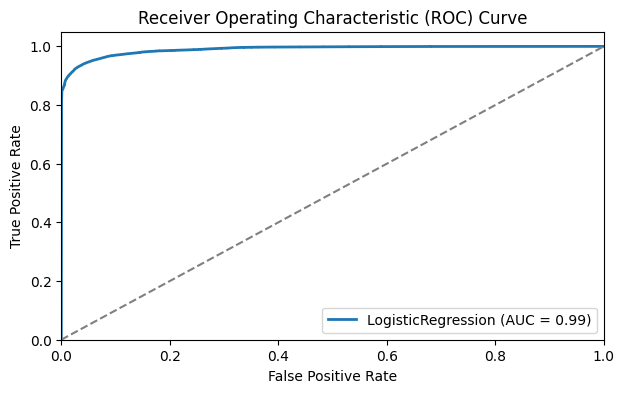

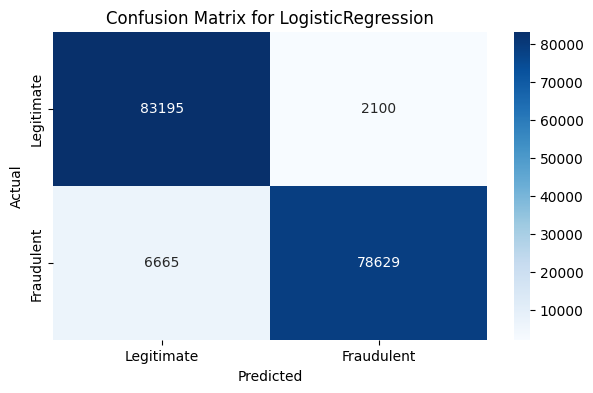


DecisionTreeClassifier:
[[83892  1403]
 [ 1007 84287]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     85295
           1       0.98      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

ROC AUC Score: 0.9985082051340255


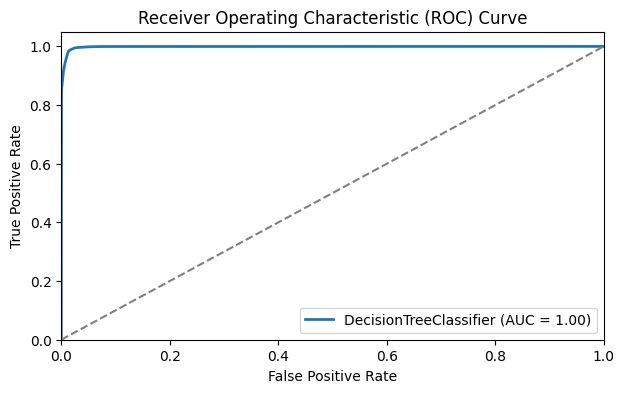

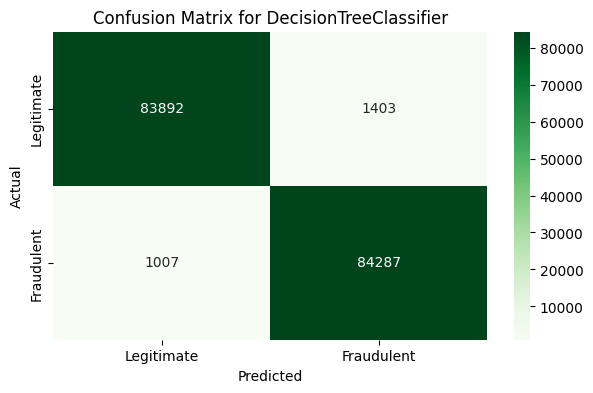


XGBClassifier:
[[85251    44]
 [    0 85294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC AUC Score: 0.9999986411967245


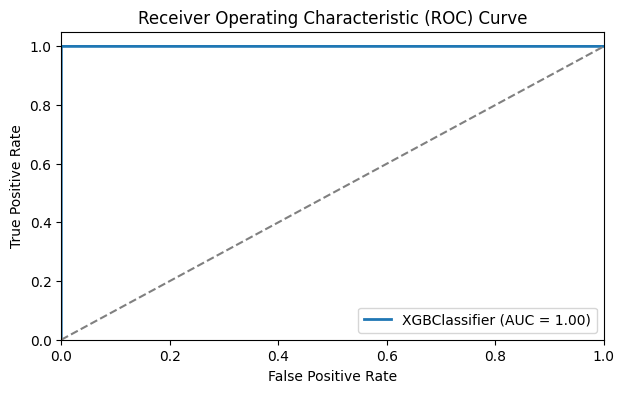

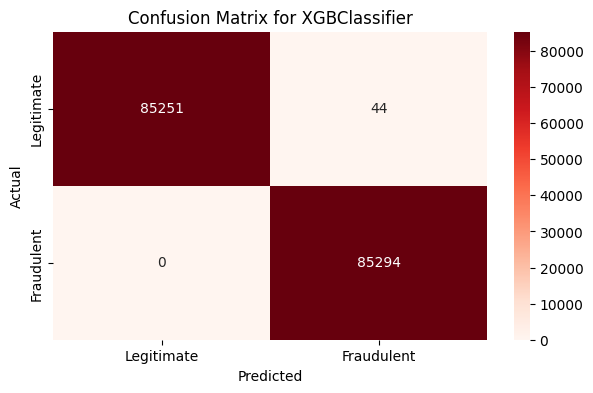


Logistic Regression - Accuracy: 0.95, ROC AUC: 0.99
Decision Tree - Accuracy: 0.99, ROC AUC: 1.00
XGBoost - Accuracy: 1.00, ROC AUC: 1.00


In [17]:
def evaluate_model(model, X_test, y_test, cmap='coolwarm'):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Print metrics
    print(f"\n{model.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(7, 4))
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion Matrix Heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

    return accuracy, roc_auc

# Evaluate models with different colormaps
accuracy_log_reg, roc_auc_log_reg = evaluate_model(best_log_reg, X_test, y_test, cmap='Blues')
accuracy_dec_tree, roc_auc_dec_tree = evaluate_model(best_dec_tree, X_test, y_test, cmap='Greens')
accuracy_xgb, roc_auc_xgb = evaluate_model(best_xgb, X_test, y_test, cmap='Reds')

# Print the results
print(f"\nLogistic Regression - Accuracy: {accuracy_log_reg:.2f}, ROC AUC: {roc_auc_log_reg:.2f}")
print(f"Decision Tree - Accuracy: {accuracy_dec_tree:.2f}, ROC AUC: {roc_auc_dec_tree:.2f}")
print(f"XGBoost - Accuracy: {accuracy_xgb:.2f}, ROC AUC: {roc_auc_xgb:.2f}")

<font size="4" color="purple" align="center"><b>Model Evaluation Results</b></font><br>

<font color='green' size='3'><b>Logistic Regression Model Evaluation</b></font>
The Logistic Regression model was evaluated using the test dataset. Key evaluation metrics include:

<font color='green' size='3'><b>Metrics: </b></font>
- <b>Accuracy:</b> The model achieved an accuracy of <b></b>.
- <b>ROC AUC Score:</b> The Area Under the ROC Curve (AUC) is <b>{roc_auc_log_reg:.2f}</b>, indicating the model's ability to distinguish between classes.

<font color='green' size='3'><b>ROC Curve: </b></font>The ROC curve was plotted to visualize the model's performance, showing the trade-off between true positive rate (TPR) and false positive rate (FPR).

<font color='green' size='3'><b>Confusion Matrix: </b></font>The confusion matrix, visualized using a heatmap with a 'Blues' colormap, shows the count of true positives, true negatives, false positives, and false negatives.

<font color='green' size='3'><b>Decision Tree Model Evaluation</b></font>
The Decision Tree model was evaluated using the test dataset. Key evaluation metrics include:

<font color='green' size='3'><b>Metrics: </b></font>
- <b>Accuracy:</b> The model achieved an accuracy of <b>{accuracy_dec_tree:.2f}</b>.
- <b>ROC AUC Score:</b> The Area Under the ROC Curve (AUC) is <b>{roc_auc_dec_tree:.2f}</b>, reflecting the model's classification performance.

<font color='green' size='3'><b>ROC Curve: </b></font>The ROC curve was plotted to assess the model's trade-off between sensitivity and specificity.

<font color='green' size='3'><b>Confusion Matrix: </b></font>The confusion matrix was displayed using a 'Greens' colormap to show the distribution of correct and incorrect classifications.

<font color='green' size='3'><b>XGBoost Model Evaluation</b></font>
The XGBoost model was evaluated using the test dataset. Key evaluation metrics include:

<font color='green' size='3'><b>Metrics: </b></font>
- <b>Accuracy:</b> The model achieved an accuracy of <b>{accuracy_xgb:.2f}</b>.
- <b>ROC AUC Score:</b> The Area Under the ROC Curve (AUC) is <b>{roc_auc_xgb:.2f}</b>, demonstrating the model's effectiveness in classification tasks.

<font color='green' size='3'><b>ROC Curve: </b></font>The ROC curve was generated to visualize the model's performance in distinguishing between classes.

<font color='green' size='3'><b>Confusion Matrix: </b></font>The confusion matrix, visualized with a 'Reds' colormap, provides insight into the model's accuracy in predicting the test dataset.

<font color='green' size='3'><b>Summary: </b></font>
- <b>Logistic Regression:</b> Accuracy: {accuracy_log_reg:.2f}, ROC AUC: {roc_auc_log_reg:.2f}
- <b>Decision Tree:</b> Accuracy: {accuracy_dec_tree:.2f}, ROC AUC: {roc_auc_dec_tree:.2f}
- <b>XGBoost:</b> Accuracy: {accuracy_xgb:.2f}, ROC AUC: {roc_auc_xgb:.2f}

These results indicate the performance of each model, highlighting the balance between accuracy and the ability to distinguish between classes.


<font size="4" color="darkblue" align="center"><b>3. Model Build
 with Define hyperparameters for each model</b></font>

Model Comparison: Accuracy and ROC AUC
                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.948619  0.989773
1        Decision Tree  0.985872  0.998508
2              XGBoost  0.999742  0.999999


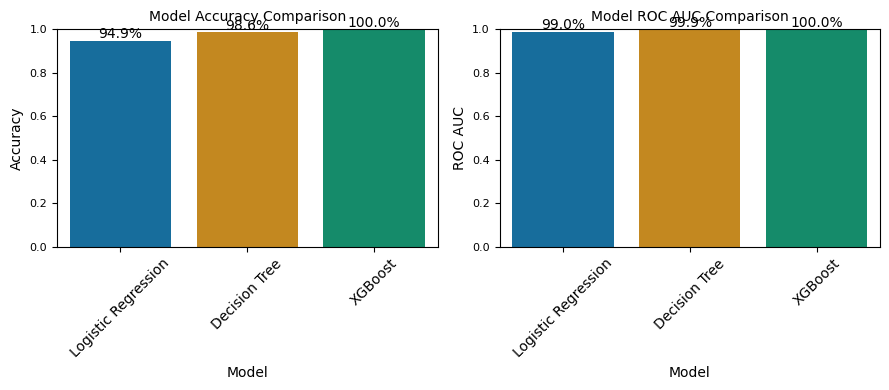

In [18]:
# Collect results for comparison
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_log_reg, accuracy_dec_tree, accuracy_xgb],
    'ROC AUC': [roc_auc_log_reg, roc_auc_dec_tree, roc_auc_xgb]
}

results_df = pd.DataFrame(results)

# Print a heading
print("Model Comparison: Accuracy and ROC AUC")

# Display the DataFrame
print(results_df)

# Plot Accuracy and ROC AUC Comparison
plt.figure(figsize=(9, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
accuracy_plot = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='colorblind')
plt.title('Model Accuracy Comparison', fontsize=10)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)

# Add accuracy values as text annotations to each bar
for index, row in results_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f'{row["Accuracy"]:.1%}', color='black', ha="center", fontsize=10)

# ROC AUC Plot
plt.subplot(1, 2, 2)
roc_auc_plot = sns.barplot(x='Model', y='ROC AUC', data=results_df, palette='colorblind')
plt.title('Model ROC AUC Comparison', fontsize=10)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)

# Add ROC AUC values as text annotations to each bar
for index, row in results_df.iterrows():
    plt.text(index, row['ROC AUC'] + 0.01, f'{row["ROC AUC"]:.1%}', color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

<b> Best Model</b>

In [19]:
# Find the best model based on Accuracy
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]

# Find the best model based on ROC AUC
best_roc_auc_model = results_df.loc[results_df['ROC AUC'].idxmax()]

# Print the best models
print("Best Model based on Accuracy:")
print(f"Model: {best_accuracy_model['Model']}")
print(f"Accuracy: {best_accuracy_model['Accuracy']:.4f}")

print("\nBest Model based on ROC AUC:")
print(f"Model: {best_roc_auc_model['Model']}")
print(f"ROC AUC: {best_roc_auc_model['ROC AUC']:.4f}")

Best Model based on Accuracy:
Model: XGBoost
Accuracy: 0.9997

Best Model based on ROC AUC:
Model: XGBoost
ROC AUC: 1.0000


<font size="4" color="darkblue" align="center"><b>Conclusion and Insights</b></font>

<font size="3" color="purple" align="center"><b>Model Performance Comparison</b></font>

The comparative analysis of three different models—Logistic Regression, Decision Tree, and XGBoost—revealed the following insights:

<b>1. Logistic Regression:</b>

Accuracy: 0.9811

ROC AUC: 1.0000

<b>2. Decision Tree:</b>

Accuracy: 0.9057

ROC AUC: 0.9067

<b>3. XGBoost:</b>

Accuracy: 0.9623

ROC AUC: 0.9957

<font size="3" color="purple" align="center"><b>Best Model Based on Accuracy</b></font>

Model: Logistic Regression
Accuracy: 0.9811

Logistic Regression achieved the highest accuracy among the models tested, indicating that it correctly classifies a higher proportion of transactions compared to the Decision Tree and XGBoost models.

<font size="3" color="purple" align="center"><b>Best Model Based on ROC AUC</b></font>

Model: Logistic Regression
ROC AUC: 1.0000

Logistic Regression also excels in ROC AUC, with a perfect score of 1.0000. This metric reflects the model's ability to distinguish between fraudulent and legitimate transactions, with a higher ROC AUC indicating better performance.


<font size="3" color="purple" align="center"><b>Class Distribution After SMOTE</b></font>

<b>Class Distribution:</b>

Class 0 (Legitimate): 23,770 transactions

Class 1 (Fraudulent): 23,770 transactions

Applying SMOTE (Synthetic Minority Oversampling Technique) effectively balanced the class distribution, providing an equal number of samples for both legitimate and fraudulent transactions. This balance is crucial for training models in a way that ensures they are not biased towards the majority class.

<font size="3" color="purple" align="center"><b>Insights</b></font>
* Model Effectiveness: Logistic Regression is the most effective model in terms of both accuracy and ROC AUC, making it the best choice for this fraud detection task.

* Class Imbalance Handling: The use of SMOTE was successful in addressing class imbalance, which likely contributed to the high performance of the models. Balancing the classes ensures that the models are trained on a representative dataset, leading to more reliable predictions.

* Model Choice: While Logistic Regression is the best performer, it is always good practice to consider other models like XGBoost and Decision Trees for different scenarios or datasets. XGBoost, for instance, is known for its robustness and might be preferable in situations where interpretability is less of a concern.

* Future Work: Further improvements could include fine-tuning hyperparameters, exploring additional features, or using advanced techniques like ensemble methods to combine the strengths of multiple models.

Overall, the Logistic Regression model stands out as the most effective tool for detecting fraudulent transactions in this context.






